# Data Cleaning and EDA

* Feature selection
* see what can be considered for Snorkel labeling

## Imports

In [458]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

import preprocessor as p

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import TweetTokenizer

pd.options.display.max_colwidth = 400

## Load Data

In [335]:
# load hash-labeled and non-labeled datasets
tweets_labeled = pd.read_csv('../data/tweets_hash_label.csv') # hash-labeled data
tweets_unlabeled = pd.read_csv('../data/twitter_scrape2.csv') # no-label data

In [336]:
tweets_labeled.head()

,datetime,tweet_id,username,text,likes,retweet,get_vaccine
0,2021-10-16 13:26:08+00:00,1.449366e+18,ColoradoMounta8,"Thank you @GovBillLee for sticking up for common sense! #MedicalFreedom #Tennessee\n""Tennessee legislators looking to call special session on COVID restrictions"" https://t.co/cUwPdcD5Yx",3.0,2.0,0
1,2022-08-01 01:29:50+00:00,1.553916e+18,GeoffyPJohnston,"When anti-Vaxxers tweet #vaccineinjuries at you, remind them that more than 18 million people around the world had died of COVID-19 by the end of 2021. Also point out that COVID vaccines saved an estimated 20 million lives in the first year. Get vaccinated. Vaccinate your kids. https://t.co/Ld9ToqLcX1",7.0,3.0,0
2,2021-07-29 18:38:33+00:00,1.420816e+18,tobybhowes,@GregoryDavisHNH @beverleyturner @JamesfWells your #naivety is breath-taking. you think removing #freedoms for #unvaccinated &amp; £325 million spent on #Jab marketing fits within the #Legal framework of #InformedConsent ? ... the patient / recipient should not feel coerced or pressurised etc. #COVID19 #Olympics #COVID,1.0,0.0,0
3,2022-08-01 17:00:00+00:00,1.554150e+18,HW_Lancashire,"What do you think about the Covid-19 vaccination?💉 Whether you have had four doses or none, we want to hear from you! You can tell us anything🗣️ whether it is positive or negative. Have your say here👉https://t.co/Wv0hA73mrg\n\n#CovidVaccine #LANCASHIRE #grabajab https://t.co/ymNZ3YdA3M",3.0,2.0,1
4,2021-12-17 12:17:42+00:00,1.471817e+18,MartheFroysadal,It’s been out there in plain sight for many years… #WakeUpEverybody ! Wake the fuck up! NOW!!! #TogetherDeclaration #arrestfaucinow #TheRealAnthonyFauci #ArrestBillGates #Nuremberg2 #NurembergCode #NurembergTrialsForCovid #NurembergCodeViolations #Covid_19 #tyranny #ww3 #WakeUp https://t.co/EyK498kinu,3.0,4.0,0


In [337]:
tweets_labeled.shape

(32843, 7)

In [338]:
tweets_unlabeled.head()

,datetime,tweet_id,username,text,likes,retweet
0,2021-01-20 23:59:58+00:00,1.352043e+18,AliceMaySays,@acevenvevo @ADM_Briggs @Anthony37662002 @VibesCake @DanielRegha @TravisAllen02 @JoeBiden 2) and Trump’s Covid response has caused those numbers to go significantly higher as did his botched vaccine release,2.0,0.0
1,2021-01-20 23:59:52+00:00,1.352043e+18,Elijah4Senate,Please read this important thread from my office with an update on COVID vaccines in Rockland and Westchester. https://t.co/rvpHjeE8Ts,7.0,4.0
2,2021-01-20 23:59:42+00:00,1.352043e+18,yvngdaggadickk,Just saw two homeless people giving themselves the COVID vaccine 🙁 faith in humanity restored ❤️,6.0,0.0
3,2021-01-20 23:59:40+00:00,1.352043e+18,patinindy,Those who refuse to get the COVID-19 vaccine could be chalked up to only endangering themselves. \n\nNot true. \n\nThey will become viral mutation factories. \n\nSome mutations will do nothing. Others enhance infectivity. /1,0.0,0.0
4,2021-01-20 23:59:38+00:00,1.352043e+18,KION546,"Santa Cruz County says the goal is to distribute vaccines to the 14,700 Phase 1A health care workers within the county, calling it a key step in the fight against COVID-19. https://t.co/pVNNC8cTKs",3.0,0.0


In [339]:
tweets_unlabeled.shape

(111959, 6)

## Data Cleaning

**Hash-labeled dataset**

In [340]:
tweets_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32843 entries, 0 to 32842
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     32843 non-null  object 
 1   tweet_id     32839 non-null  float64
 2   username     32839 non-null  object 
 3   text         32837 non-null  object 
 4   likes        32835 non-null  float64
 5   retweet      32835 non-null  float64
 6   get_vaccine  32843 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 1.8+ MB


In [341]:
tweets_labeled.isnull().sum()

datetime       0
tweet_id       4
username       4
text           6
likes          8
retweet        8
get_vaccine    0
dtype: int64

In [342]:
tweets_labeled[tweets_labeled['likes'].isnull()]

,datetime,tweet_id,username,text,likes,retweet,get_vaccine
4896,THE #UNVAXXED,NaN,NaN,NaN,NaN,NaN,0
7372,MESSAGE FROM God ✝️❤️,NaN,NaN,NaN,NaN,NaN,0
10726,YOU ARE IN GOOD COMPANY! https://t.co/4iDBSelPeJ,2.100000e+01,13,NaN,NaN,NaN,0
13846,WAKEUP PEOPLE!!! 🔥,2.000000e+00,2,NaN,NaN,NaN,0
18221,2021-12-03 06:30:11+00:00,1.466656e+18,HipFriends,@TheInsiderPaper #Wakeup #Agenda2030 #VaccinePassports #Transhumanism #Vaccines #Depopulation #DoNotComply #Freedom #Covid #Tech #IoT #IoT #AI #robots #GreatReset,NaN,NaN,0
21596,DO NOT GIVE YOUR #CHILDREN THE #VACCINES,NaN,NaN,NaN,NaN,NaN,0
27396,2021-10-17 21:59:57+00:00,1.449858e+18,HipFriends,#God #Jesus #covid #CovidVaccines #vaccinated #Covid19 #vaccineinjuries #VaccineDeaths #DEATH #DEPOPULATION #GreatReset #Ivermectin #PleaseRetweet,NaN,NaN,0
31499,DO NOT TAKE THE #VACCINE,NaN,NaN,NaN,NaN,NaN,0


In [343]:
tweets_labeled = tweets_labeled.dropna().reset_index(drop=True)

In [344]:
tweets_labeled.shape # 

(32835, 7)

It seems like there was some error that misplaced values under wrong column name when parsing the data from twitter. To make EDA and analysis easier, I dropped any rows with null values. Doing so should not affect the modeling result dramatically since it is less than 0.01% of the dataframe. It ended up dropping 8 rows total.

**unlabeled dataset**

In [345]:
tweets_unlabeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111959 entries, 0 to 111958
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   datetime  111959 non-null  object 
 1   tweet_id  111958 non-null  float64
 2   username  111958 non-null  object 
 3   text      111957 non-null  object 
 4   likes     111956 non-null  float64
 5   retweet   111956 non-null  float64
dtypes: float64(3), object(3)
memory usage: 5.1+ MB


In [346]:
tweets_unlabeled.isnull().sum()

datetime    0
tweet_id    1
username    1
text        2
likes       3
retweet     3
dtype: int64

In [347]:
tweets_unlabeled[tweets_unlabeled['likes'].isnull()]

,datetime,tweet_id,username,text,likes,retweet
65581,2021-12-12 23:55:04+00:00,1.470180e+18,HipFriends,#DoNotComply #AI #IoT #NWO #VaccineSideEffects #VaccineDeaths #NoVaccinePassports #Covid #Covid19 #vaccines #NoVaccineMandates #GREATRESET,NaN,NaN
65582,MUST SEE🔥‼️‼️,NaN,NaN,NaN,NaN,NaN
65583,THE GREAT RESET &amp; COVID &amp; SILENT WEAPONS https://t.co/UMhzicXYWv,1.000000e+00,2,NaN,NaN,NaN


In [348]:
tweets_unlabeled = tweets_unlabeled.dropna().reset_index(drop=True)

In [349]:
tweets_unlabeled.shape

(111956, 6)

Same with unlabeled dataset, I dropped any rows containing null values which ended up dropping 3 rows total.

## EDA (I)
EDA before preprocessing the text data

#### *Hash-labled dataset*

In [350]:
# label distribution
tweets_labeled['get_vaccine'].value_counts(normalize=True)

0    0.509487
1    0.490513
Name: get_vaccine, dtype: float64

The class is balanced with 50% of each class in the dataset.

In [351]:
# define functions to filter out the specific class. 
def no_vax(df):
    return df[df['get_vaccine']==0]

def yes_vax(df):
    return df[df['get_vaccine']==1]

* **charachter and word counts**

In [352]:
tweets_labeled['text'].dtype

dtype('O')

In [353]:
tweets_labeled['text'].str.len()

0        185
1        302
2        320
3        284
4        302
        ... 
32830    252
32831    275
32832    227
32833    190
32834    302
Name: text, Length: 32835, dtype: int64

In [354]:
tweets_labeled['text'].astype(str) # change all values in text column to string

0                                                                                                                                              Thank you @GovBillLee for sticking up for common sense!  #MedicalFreedom #Tennessee\n"Tennessee legislators looking to call special session on COVID restrictions" https://t.co/cUwPdcD5Yx
1                          When anti-Vaxxers tweet #vaccineinjuries at you, remind them that more than 18 million people around the world had died of COVID-19 by the end of 2021. Also point out that COVID vaccines saved an estimated 20 million lives in the first year. Get vaccinated. Vaccinate your kids. https://t.co/Ld9ToqLcX1
2        @GregoryDavisHNH @beverleyturner @JamesfWells your #naivety is breath-taking. you think removing #freedoms for #unvaccinated &amp; £325 million spent on #Jab marketing fits within the #Legal framework of #InformedConsent ? ... the patient / recipient should not feel coerced or pressurised etc. #COVID19 #Olympics #COVID
3         

In [355]:
# 'n_char' and 'n_words' columns
tweets_labeled['n_char'] = tweets_labeled['text'].str.len()
tweets_labeled['n_words'] = tweets_labeled['text'].map(lambda x: len(x.split(' ')))

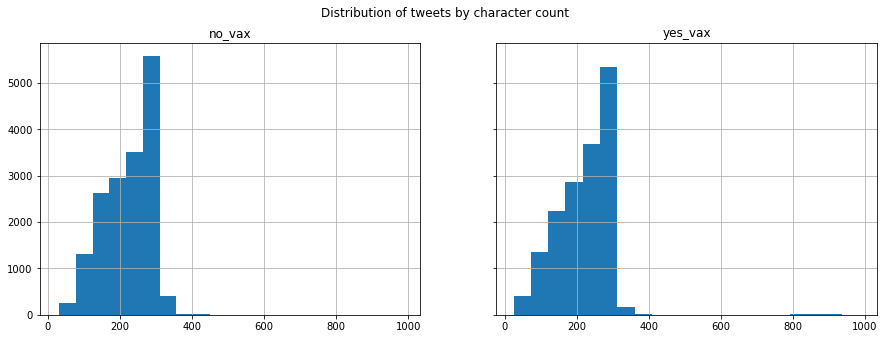

In [356]:
# 'n_char' distribution
fig, axs = plt.subplots(1, 2, figsize = (15, 5), sharey = True, sharex = True)

a = tweets_labeled[tweets_labeled['get_vaccine']==0]['n_char'].hist(ax = axs[0], bins=20)
b = tweets_labeled[tweets_labeled['get_vaccine']==1]['n_char'].hist(ax = axs[1], bins=20)

a.set(title = 'no_vax')
b.set(title = 'yes_vax')

fig.suptitle('Distribution of tweets by character count');

The distribution of the textlength by character count are almost identical in both sets. They are both left skewed with majority of texts in the 300 characters range. 

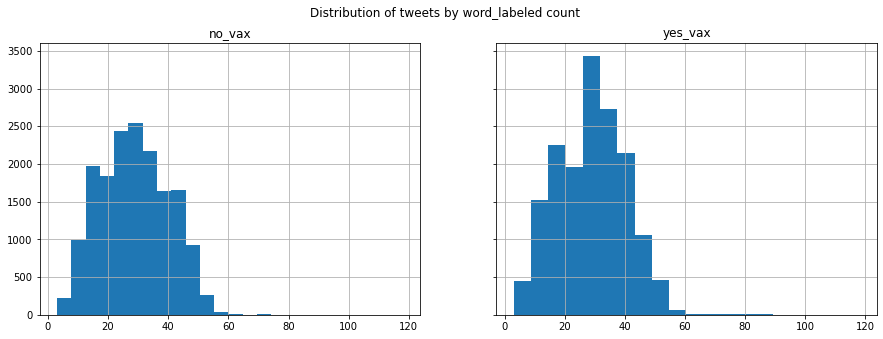

In [357]:
# 'n_words' distribution
fig, axs = plt.subplots(1, 2, figsize = (15, 5), sharey = True, sharex = True)

a = tweets_labeled[tweets_labeled['get_vaccine']==0]['n_words'].hist(ax = axs[0], bins=20)
b = tweets_labeled[tweets_labeled['get_vaccine']==1]['n_words'].hist(ax = axs[1], bins=20)

a.set(title = 'no_vax')
b.set(title = 'yes_vax')

fig.suptitle('Distribution of tweets by word_labeled count');

Again, shapes of the distribution are similar for both classes. There is slightly higher number of texts in 30 words range for pro-twitter users. 

In [358]:
# describe
no_vax(tweets_labeled)[['n_char', 'n_words']].describe()

,n_char,n_words
count,16729.00000,16729.000000
mean,222.06145,28.663399
std,68.31110,11.315694
min,31.00000,3.000000
25%,170.00000,20.000000
50%,233.00000,28.000000
75%,277.00000,37.000000
max,960.00000,98.000000


In [359]:
yes_vax(tweets_labeled)[['n_char', 'n_words']].describe()

,n_char,n_words
count,16106.000000,16106.000000
mean,220.604557,28.739166
std,75.252823,11.383494
min,25.000000,3.000000
25%,169.000000,20.000000
50%,235.000000,29.000000
75%,277.000000,37.000000
max,985.000000,118.000000


Even with qualitative judgement without statistical testing, the number of characters and number of words between the two classes are very similar. With a big chance, these features are unlikely to help us classify between the two classes. 

* **Hashtags**

Hashtags should be different in the two, considering that the data was labeled using hashtag features. However, there should be other hashtags associated with each class, that were not included in the list of hashtags used to label the data. 

In [360]:
# extract hashtags using regex patterns, # followed by the hashtag
tweets_labeled['hashtag'] = tweets_labeled['text'].apply(lambda x: re.findall(r"#(\w+)", x))

In [361]:
tweets_labeled.head(3)

,datetime,tweet_id,username,text,likes,retweet,get_vaccine,n_char,n_words,hashtag
0,2021-10-16 13:26:08+00:00,1.449366e+18,ColoradoMounta8,"Thank you @GovBillLee for sticking up for common sense! #MedicalFreedom #Tennessee\n""Tennessee legislators looking to call special session on COVID restrictions"" https://t.co/cUwPdcD5Yx",3.0,2.0,0,185,22,"[MedicalFreedom, Tennessee]"
1,2022-08-01 01:29:50+00:00,1.553916e+18,GeoffyPJohnston,"When anti-Vaxxers tweet #vaccineinjuries at you, remind them that more than 18 million people around the world had died of COVID-19 by the end of 2021. Also point out that COVID vaccines saved an estimated 20 million lives in the first year. Get vaccinated. Vaccinate your kids. https://t.co/Ld9ToqLcX1",7.0,3.0,0,302,48,[vaccineinjuries]
2,2021-07-29 18:38:33+00:00,1.420816e+18,tobybhowes,@GregoryDavisHNH @beverleyturner @JamesfWells your #naivety is breath-taking. you think removing #freedoms for #unvaccinated &amp; £325 million spent on #Jab marketing fits within the #Legal framework of #InformedConsent ? ... the patient / recipient should not feel coerced or pressurised etc. #COVID19 #Olympics #COVID,1.0,0.0,0,320,43,"[naivety, freedoms, unvaccinated, Jab, Legal, InformedConsent, COVID19, Olympics, COVID]"


In [362]:
# filter out the hashtags used for labeling

# Reading and listing no_vac hashtags
file = open("../data/antivax_hashtags.txt", "r")
data = file.read()
antivax_hash = data.split("\n")
file.close()

# Reading and listing yes_vac hashtags
file = open("../data/provax_hashtags.txt", "r")
data = file.read()
provax_hash = data.split("\n")
file.close()

In [363]:
label_hashtags = antivax_hash + provax_hash

In [364]:
# loop over each index of the tweets
for i in tweets_labeled.index:
    
    # call the hashtag list
    hashtags = tweets_labeled['hashtag'][i]
    hashtag_remove = []
    
    # loop over each hashtag in the hashtags list
    for hashtag in hashtags:
        # check if the hashtag is part of the hashtags used for labeling the data and remove if True
        if hashtag in label_hashtags:
            hashtag_remove.append(hashtag)
    
    # update the hashtags column
    hashtags = [hashtag for hashtag in hashtags if hashtag not in hashtag_remove]
    tweets_labeled.at[i, 'hashtag'] = hashtags

In [365]:
# counts of different hashtags in each label

# no_vax
hash_no = {}

for i in no_vax(tweets_labeled).index:
    for item in no_vax(tweets_labeled)['hashtag'][i]:
        if item not in hash_no.keys():
            hash_no[item] = 0
        
        hash_no[item] += 1
        
# yes_vax
hash_yes = {}

for i in yes_vax(tweets_labeled).index:
    for item in yes_vax(tweets_labeled)['hashtag'][i]:
        if item not in hash_yes.keys():
            hash_yes[item] = 0
        
        hash_yes[item] += 1

In [366]:
hash_no_df = pd.DataFrame(hash_no.values(), index=hash_no.keys(), columns=['n'])
hash_yes_df = pd.DataFrame(hash_yes.values(), index=hash_yes.keys(), columns=['n'])

In [367]:
hash_no_df.sort_values("n", ascending=False)

,n
COVID,2239
COVID19,2032
Covid_19,1680
covid,1375
NoVaccineMandates,1060
...,...
sparspandemic,1
xbox,1
nfl,1
lions,1


In [368]:
hash_yes_df.sort_values("n", ascending=False)

,n
COVID19,2832
COVID,2336
covid,1423
IndiaFightsCorona,1245
Covid_19,1145
...,...
sycophants,1
DrSameerBhati,1
Hindustanmerijaan,1
information,1


In [369]:
hash_no_df.describe()

,n
count,13297.000000
mean,5.118673
std,42.511758
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2239.000000


In [370]:
hash_yes_df.describe()

,n
count,9525.000000
mean,5.367979
std,51.161350
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2832.000000


For both of the classes, majority of the hashtags do not appear more than once. 25% of the hashtags appear more than twice. 

In [371]:
hash_no_df.sort_values('n', ascending=False).head(20)

,n
COVID,2239
COVID19,2032
Covid_19,1680
covid,1375
NoVaccineMandates,1060
vaccine,1047
Covid,1001
coronavirus,873
InformedConsent,748
AntiVaccine,636


In [372]:
hash_yes_df.sort_values('n', ascending=False).head(20)

,n
COVID19,2832
COVID,2336
covid,1423
IndiaFightsCorona,1245
Covid_19,1145
Unite2FightCorona,1000
Covid,811
vaccine,686
StaySafe,679
covidvaccine,659


In [373]:
hash_no_df = hash_no_df.sort_values('n', ascending=False).head(20)
hash_yes_df = hash_yes_df.sort_values('n', ascending=False).head(20)

I picked top 20 hashtags from each class. The least mentioned hashtag "COVIDAppropriateBehaviour" is mentioned in about 1% of the whole dataset. hashtags mentioned less than 1% will not be considered, as it likely does not contribute to classifying the class a lot.

In [374]:
# remove overlap to see hashtags exclusive to each set
overlap = list(set(hash_no_df.index).intersection(set(hash_yes_df.index)))
overlap

['COVID',
 'covid19',
 'Covid',
 'coronavirus',
 'vaccine',
 'covid',
 'COVID19',
 'Covid_19']

In [375]:
# Drop the overlapping hashtags as they are general covid terms regardless of anti or pro vaccine. 
hash_no_df = hash_no_df.drop(index=overlap).sort_values('n', ascending=False)
hash_yes_df = hash_yes_df.drop(index=overlap).sort_values('n', ascending=False)

In [376]:
hash_no_df

,n
NoVaccineMandates,1060
InformedConsent,748
AntiVaccine,636
vaccines,549
MyBodyMyChoice,545
ExposeBillGates,539
NoVaccinePassports,528
VaccineSideEffects,513
MedicalFreedom,503
IDoNotConsent,484


In [377]:
hash_yes_df

,n
IndiaFightsCorona,1245
Unite2FightCorona,1000
StaySafe,679
covidvaccine,659
GetVaccinated,473
vaccination,454
Vaccinated,417
LargestVaccinationDrive,381
healthcare,360
COVIDisAirborne,337


These may possibly used as features for the model. 

In [378]:
unique_hash = list(hash_no_df[hash_no_df['n']>100].index ) + list(hash_yes_df[hash_yes_df['n']>100].index)

In [379]:
unique_hash

['NoVaccineMandates',
 'InformedConsent',
 'AntiVaccine',
 'vaccines',
 'MyBodyMyChoice',
 'ExposeBillGates',
 'NoVaccinePassports',
 'VaccineSideEffects',
 'MedicalFreedom',
 'IDoNotConsent',
 'BillGates',
 'VaccineInjury',
 'IndiaFightsCorona',
 'Unite2FightCorona',
 'StaySafe',
 'covidvaccine',
 'GetVaccinated',
 'vaccination',
 'Vaccinated',
 'LargestVaccinationDrive',
 'healthcare',
 'COVIDisAirborne',
 'COVIDAppropriateBehaviour',
 'Covid19']

In [380]:
# loop over each index of the tweets
for i in tweets_labeled.index:
    
    # call the hashtag list
    hashtags = tweets_labeled['hashtag'][i]
    hashtag_remove = []
    
    # loop over each hashtag in the hashtags list
    for hashtag in hashtags:
        # check if the hashtag is part of the hashtags used for labeling the data and remove if True
        if hashtag not in unique_hash:
            hashtag_remove.append(hashtag)
    
    # update the hashtags column
    hashtags = [hashtag for hashtag in hashtags if hashtag not in hashtag_remove]
    tweets_labeled.at[i, 'hashtag'] = hashtags

In [381]:
tweets_labeled[['hashtag']]

,hashtag
0,[MedicalFreedom]
1,[]
2,[InformedConsent]
3,[]
4,[]
...,...
32830,[]
32831,[]
32832,[]
32833,[AntiVaccine]


* **Likes and Retweets**

In [382]:
tweets_labeled.groupby('get_vaccine')[['likes', 'retweet']].describe().T

get_vaccine               0             1
likes   count  16729.000000  16106.000000
        mean       7.740630      8.652241
        std      147.544210    103.555626
        min        0.000000      0.000000
        25%        0.000000      0.000000
        50%        0.000000      1.000000
        75%        2.000000      4.000000
        max    13725.000000  10059.000000
retweet count  16729.000000  16106.000000
        mean       2.939925      2.071216
        std       61.592119     18.801988
        min        0.000000      0.000000
        25%        0.000000      0.000000
        50%        0.000000      0.000000
        75%        1.000000      1.000000
        max     7129.000000   1689.000000

There are too many tweets that have no likes or retweets at all. More than 50% of the no_vax class have no likes or retweets. About 50% of the yes_vax tweets have more than 1 likes, 25% have more than 4 likes, therefore slightly higher median than that of the no_vax group. However, the maximum value is less in yes_vax class. More than 50% of yes_vax tweets also have no retweets.


Although there is a slight difference in the central tendency in number of likes, most of the variance likely comes from the outliers that have thousands of likes. Therefore, it is the number of likes and retweets will **unlikley** be helpful in classifying between the two classes.

#### *unlabeled dataset*

* **charachter and word counts**

In [383]:
tweets_unlabeled['text'].dtype

dtype('O')

In [384]:
tweets_unlabeled['text'].astype(str) # change all values in text column to string

0                                                 @acevenvevo @ADM_Briggs @Anthony37662002 @VibesCake @DanielRegha @TravisAllen02 @JoeBiden 2) and Trump’s Covid response has caused those numbers to go significantly higher as did his botched vaccine release
1                                                                                                                         Please read this important thread from my office with an update on COVID vaccines in Rockland and Westchester. https://t.co/rvpHjeE8Ts
2                                                                                                                                                               Just saw two homeless people giving themselves the COVID vaccine 🙁 faith in humanity restored ❤️
3                           Those who refuse to get the COVID-19 vaccine could be chalked up to only endangering themselves.  \n\nNot true.  \n\nThey will become viral mutation factories.  \n\nSome mutations will do nothing. Othe

In [385]:
# 'n_char' and 'n_words' columns
tweets_unlabeled['n_char'] = tweets_unlabeled['text'].str.len()
tweets_unlabeled['n_words'] = tweets_unlabeled['text'].map(lambda x: len(x.split(' ')))

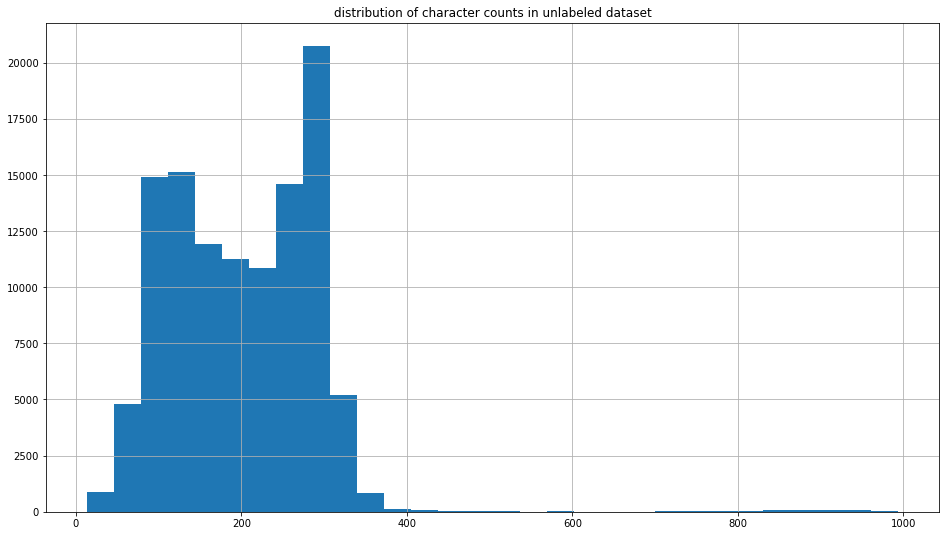

In [386]:
# 'n_char' distribution
plt.figure(figsize=(16, 9))
tweets_unlabeled['n_char'].hist(bins=30).set_title('distribution of character counts in unlabeled dataset');

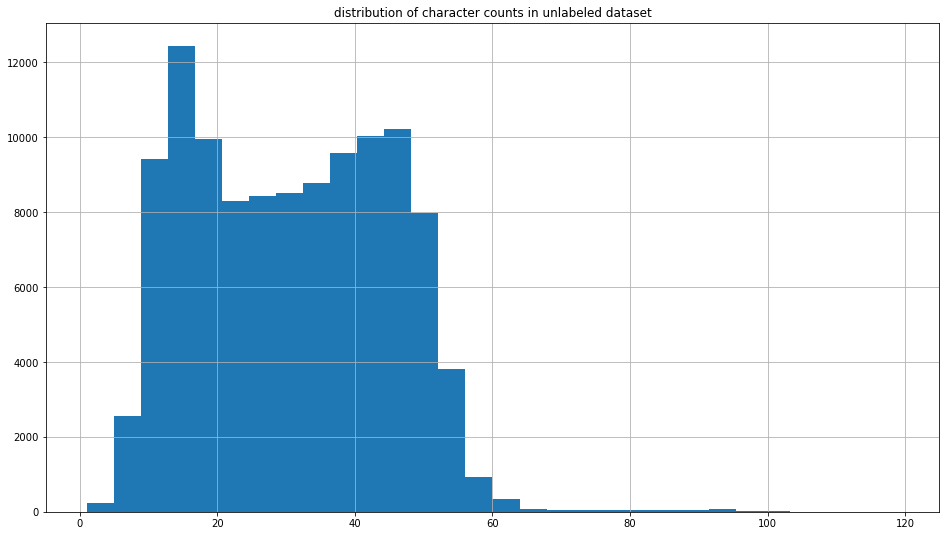

In [387]:
plt.figure(figsize=(16, 9))
tweets_unlabeled['n_words'].hist(bins=30).set_title('distribution of character counts in unlabeled dataset');

The character counts and word counts take similar distribution shape likely because the two values are related. 

In [388]:
# describe
tweets_unlabeled[['n_char', 'n_words']].describe()

,n_char,n_words
count,111956.000000,111956.000000
mean,201.119065,30.802190
std,90.705922,14.395691
min,13.000000,1.000000
25%,126.000000,18.000000
50%,201.000000,31.000000
75%,274.000000,43.000000
max,994.000000,119.000000


* **Likes and Retweets**

In [389]:
tweets_labeled[['likes', 'retweet']].describe().T

,count,mean,std,min,25%,50%,75%,max
likes,32835.0,8.187787,127.871161,0.0,0.0,1.0,3.0,13725.0
retweet,32835.0,2.513811,45.894594,0.0,0.0,0.0,1.0,7129.0


## Texts Processing

In [413]:
# processing function
def text_process(df, text):
    # Removing hashtags, URLs, mentions, reserved words, emojis, smileys
    df['p_text'] = df[text].apply(lambda x: p.clean(x))
    
    # Remove digits
    df['p_text'] = df['p_text'].str.replace('\d+', '', regex=True)
    
    # remove punctuations
    df['p_text'] = df['p_text'].str.replace('&amp', '')
    df['p_text'] = df['p_text'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))
    
    # lower case
    df['p_text'] = df['p_text'].str.lower()
    
    # remove stopwords first
    stop_words = set(stopwords.words('english'))
    df['p_text'] = df['p_text'].apply(lambda x: " ".join([item for item in x.split(' ') if item not in stop_words]))
    
    # tokenize and lemmatize
    lem = WordNetLemmatizer()
    tok = TweetTokenizer()
    
    for i, txt in enumerate(df['p_text']):
        lem_words = [lem.lemmatize(word) for word in tok.tokenize(txt)]
        df.at[i, 'p_text'] = ' '.join(lem_words)

In [414]:
text_process(tweets_labeled, 'text')

In [415]:
tweets_labeled[['text', 'p_text']].head(3)

,text,p_text
0,"Thank you @GovBillLee for sticking up for common sense! #MedicalFreedom #Tennessee\n""Tennessee legislators looking to call special session on COVID restrictions"" https://t.co/cUwPdcD5Yx",thank sticking common sense tennessee legislator looking call special session covid restriction
1,"When anti-Vaxxers tweet #vaccineinjuries at you, remind them that more than 18 million people around the world had died of COVID-19 by the end of 2021. Also point out that COVID vaccines saved an estimated 20 million lives in the first year. Get vaccinated. Vaccinate your kids. https://t.co/Ld9ToqLcX1",anti vaxxers tweet remind million people around world died covid end also point covid vaccine saved estimated million life first year get vaccinated vaccinate kid
2,@GregoryDavisHNH @beverleyturner @JamesfWells your #naivety is breath-taking. you think removing #freedoms for #unvaccinated &amp; £325 million spent on #Jab marketing fits within the #Legal framework of #InformedConsent ? ... the patient / recipient should not feel coerced or pressurised etc. #COVID19 #Olympics #COVID,breath taking think removing million spent marketing fit within framework patient recipient feel coerced pressurised etc


In [416]:
# check for null values
tweets_labeled.isnull().sum()

datetime       0
tweet_id       0
username       0
text           0
likes          0
retweet        0
get_vaccine    0
n_char         0
n_words        0
hashtag        0
p_text         0
dtype: int64

In [417]:
# check for blank texts
tweets_labeled[tweets_labeled['p_text']==''][['text', 'p_text']]

,text,p_text
884,From #mybodymychoice to #YourBodyGovernmentChoice \n\n#Covid #vaccinesmandates #abortion #roevwade #Inflation #gasprices https://t.co/5ND1dgnpAB,
1455,#Covid_19 #Vaccine #RollUp for the #BlisteryTour. #VaccinesKill #VaccinesMaim,
2084,With #CardiacMan #Boosted at the #AustralianInstituteOfSport #Canberra @theAIS #COVID #Vaxed https://t.co/Gzbft4bWqj,
2299,https://t.co/H8mP5Nc2yT\nWatch this #COVID19 #COVID19Vic #Covid #Canada #InformedConsent #malone,
2590,#JustinTrudeau here is the #Science @JustinTrudeau\n#COVID #unvaccinated #vaccinated #VaccineSideEffects #VaccinateOurKids 🤯\n#vaccineinjuries\nhttps://t.co/TO8gfirSOQ,
...,...,...
29318,#COVID The #unvaccinated are the #heros.\n#COVID19 https://t.co/nh6UoX3GZD,
31282,@Covid_1984_ I am with you.\n#BillGatesBioTerrorist \n#BillGatesGoBack,
31997,More #COVID #VaccineInjury #VaccineFailure https://t.co/mLuVX1eD6x,
32465,The #pandemic of the #vaccinated #covid #pfizer\nhttps://t.co/9OKCLjdUKM,


In [418]:
# remove rows with blank text. These originally only consist of hashtags and urls.
tweets_labeled = tweets_labeled.drop(index=tweets_labeled[tweets_labeled['p_text']==''].index).reset_index(drop=True)

## EDA (II)
EDA after preprocessing texts

**Common unigrams and bigrams**

no_vax class

In [425]:
# unigram
cvec = CountVectorizer(stop_words=['bill', 'gate'])

no_cvec = cvec.fit_transform(no_vax(tweets_labeled)['p_text'])

no_cvec_df = pd.DataFrame(no_cvec.todense(), columns = cvec.get_feature_names_out())


In [426]:
no_cvec_df.sum().sort_values(ascending=False).head(15)

covid          11679
vaccine         5538
people          2287
get             1752
death           1157
vaccinated       941
one              922
know             812
still            746
like             745
year             732
want             700
vaccination      690
shot             679
say              674
dtype: int64

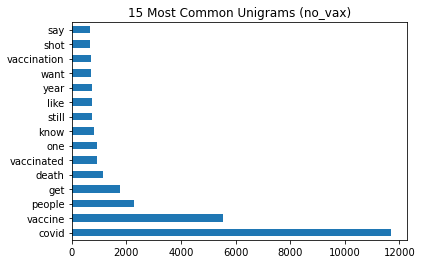

In [427]:
no_cvec_df.sum().sort_values(ascending = False).head(15).plot(kind='barh', 
                                                                       title='15 Most Common Unigrams (no_vax)');

In [428]:
# bigrams
cvec_2 = CountVectorizer(stop_words = ['bill', 'gate'], ngram_range=(2, 2))

no_cvec2 = cvec_2.fit_transform(no_vax(tweets_labeled)['p_text'])

no_cvec2_df = pd.DataFrame(no_cvec2.todense(), columns = cvec_2.get_feature_names_out())

In [429]:
no_cvec2_df.sum().sort_values(ascending=False).head(15)

covid vaccine          2492
get covid               347
covid vaccination       287
covid death             274
side effect             249
covid shot              230
covid jab               205
getting covid           170
died covid              162
vaccine mandate         161
got covid               156
covid vax               152
conspiracy theorist     146
immune system           134
get vaccinated          127
dtype: int64

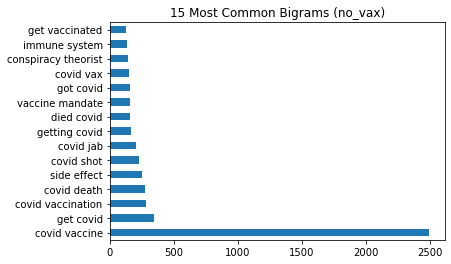

In [430]:
no_cvec2_df.sum().sort_values(ascending = False).head(15).plot(kind='barh', 
                                                                       title='15 Most Common Bigrams (no_vax)');

yes_vax class

In [431]:
# unigrams
cvec = CountVectorizer()

yes_cvec = cvec.fit_transform(yes_vax(tweets_labeled)['p_text'])

yes_cvec_df = pd.DataFrame(yes_cvec.todense(), columns = cvec.get_feature_names_out())

In [432]:
yes_cvec_df.sum().sort_values(ascending=False).head(15)

covid          12586
vaccine         5180
get             2898
vaccination     2021
vaccinated      1666
people          1526
got             1348
booster         1193
getting         1074
day             1057
today           1017
still           1002
dose             976
shot             960
first            920
dtype: int64

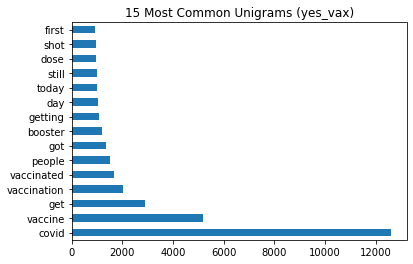

In [433]:
yes_cvec_df.sum().sort_values(ascending = False).head(15).plot(kind='barh', 
                                                                       title='15 Most Common Unigrams (yes_vax)');

In [434]:
# bigrams
cvec_2 = CountVectorizer(ngram_range=(2, 2))

yes_cvec2 = cvec_2.fit_transform(yes_vax(tweets_labeled)['p_text'])

yes_cvec2_df = pd.DataFrame(yes_cvec2.todense(), columns = cvec_2.get_feature_names_out())

In [435]:
yes_cvec2_df.sum().sort_values(ascending=False).head(15)

covid vaccine        2498
covid vaccination     855
get vaccinated        493
first dose            356
get covid             348
getting covid         336
covid booster         313
got covid             306
last hour             305
covid case            268
win battle            258
battle covid          257
together win          243
covid follow          232
vaccination site      228
dtype: int64

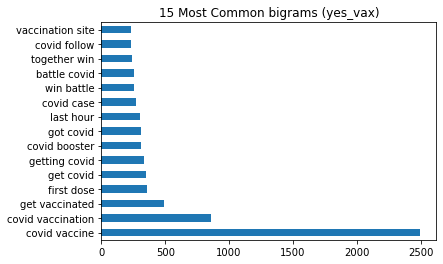

In [436]:
yes_cvec2_df.sum().sort_values(ascending = False).head(15).plot(kind='barh', 
                                                                       title='15 Most Common bigrams (yes_vax)');

Remove corpus specific stop words?

In [437]:
X = tweets_labeled['p_text']
y = tweets_labeled['get_vaccine']

In [438]:
stopwords = []

for num in range(5):

    # Vectorize
    tfidf = TfidfVectorizer(
    stop_words=stopwords,
    ngram_range=(1, 2),
    min_df=20,
    max_df=0.9,
    strip_accents='ascii')

    # Fit/Transform Vectorizer
    X_transform = tfidf.fit_transform(X)

    # Logistic Regression model prediction
    lr = LogisticRegression()
    lr.fit(X_transform, y)
    print(f'Iteration {num + 1} Complete')

    # Use low coefficients between 0.5 and -0.5 and add them to the list of stopwords to use in the next iteration
    coefficients = pd.DataFrame(lr.coef_, columns=tfidf.get_feature_names_out()).T
    low_coef_words = coefficients[(coefficients[0] < 0.5) & (coefficients[0] > -0.5)].T.columns
    stopwords.extend(low_coef_words)

# Final Fit/Transform with completed stopwords list
X_transform = tfidf.fit_transform(X)

Iteration 1 Complete


/Users/rhoeunpark/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['able', 'adhering', 'administered', 'adverse', 'advisable', 'affect', 'ago', 'allergic', 'anti', 'anyone', 'appointment', 'approved', 'around', 'astrazeneca', 'august', 'authority', 'autonomy', 'available', 'avoid', 'back', 'best', 'biden', 'bill', 'billionaire', 'boosted', 'booster', 'called', 'campaign', 'card', 'case', 'catching', 'caused', 'centre', 'check', 'choice', 'clinic', 'clot', 'company', 'conspiracy', 'contracted', 'contracting', 'control', 'covid', 'cr', 'crime', 'crore', 'day', 'decision', 'delta', 'despite', 'detail', 'died', 'disease', 'distance', 'distancing', 'doctor', 'done', 'dos', 'dose', 'double', 'drive', 'effect', 'effective', 'eligible', 'emergency', 'event', 'every', 'experimental', 'expose', 'fake', 'fauci', 'fear', 'feel', 'felt', 'fi

Iteration 2 Complete


/Users/rhoeunpark/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['adhering', 'administered', 'adverse', 'advisable', 'affect', 'ago', 'allergic', 'almost', 'anti', 'appointment', 'approved', 'around', 'astrazeneca', 'august', 'authority', 'autonomy', 'available', 'avoid', 'back', 'best', 'better', 'big', 'bill', 'billionaire', 'body', 'boosted', 'booster', 'bullshit', 'called', 'came', 'campaign', 'card', 'case', 'catching', 'caused', 'cdc', 'centre', 'certificate', 'check', 'choice', 'clinic', 'clot', 'coming', 'community', 'company', 'complication', 'conspiracy', 'contracted', 'contracting', 'control', 'corona', 'county', 'cr', 'crime', 'crore', 'day', 'decision', 'delta', 'despite', 'detail', 'died', 'disease', 'distance', 'doctor', 'done', 'dos', 'dose', 'double', 'drive', 'effective', 'eligible', 'emergency', 'event', 'ev

Iteration 3 Complete


/Users/rhoeunpark/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['adhering', 'administered', 'adverse', 'advisable', 'affect', 'ago', 'allergic', 'anti', 'appointment', 'approved', 'around', 'astrazeneca', 'august', 'authority', 'autonomy', 'available', 'avoid', 'back', 'best', 'bill', 'billion', 'billionaire', 'body', 'boosted', 'booster', 'bullshit', 'called', 'came', 'campaign', 'case', 'caused', 'cdc', 'centre', 'check', 'choice', 'clinic', 'clot', 'coming', 'community', 'company', 'complication', 'conspiracy', 'contracted', 'contracting', 'control', 'corona', 'county', 'cr', 'crime', 'crore', 'day', 'decision', 'delta', 'despite', 'detail', 'developed', 'died', 'distance', 'doctor', 'done', 'dos', 'dose', 'drive', 'effective', 'eligible', 'emergency', 'event', 'experimental', 'expose', 'fake', 'far', 'fear', 'feel', 'felt

Iteration 4 Complete
Iteration 5 Complete


In [439]:
X_transform

<32771x1515 sparse matrix of type '<class 'numpy.float64'>'
	with 151771 stored elements in Compressed Sparse Row format>

In [440]:
df = pd.DataFrame(X_transform.todense(), columns = tfidf.get_feature_names_out())

In [442]:
df.sum().sort_values(ascending=False).head(15)

get            1098.865815
vaccination     722.275053
got             584.693680
getting         531.154026
still           522.147109
day             447.089434
case            441.334875
booster         416.464043
first           374.067595
today           368.915436
want            349.390329
right           330.939189
jab             330.416003
world           311.683527
pandemic        310.662202
dtype: float64

## Save CSV file

In [459]:
tweets_processed = tweets[['datetime','text', 'p_text', 'hashtag', 'get_vaccine']]

In [460]:
# set 1000 aside to test labeling function
tweets_labeled_dev = tweets_processed.sample(1000, random_state=42)

In [461]:
# remaining for modeling
tweets_processed = tweets_processed.drop(index=tweets_labeled_dev.index)

In [465]:
# set 0.2 of the remaining for test set
tweets_test = tweets_processed.sample(frac=0.2, random_state=42)
tweets_train = tweets_processed.drop(index=tweets_test.index)

In [466]:
# reset indeces
tweets_labeled_dev = tweets_labeled_dev.reset_index(drop=True)
tweets_test = tweets_test.reset_index(drop=True)
tweets_train = tweets_train.reset_index(drop=True)

In [467]:
tweets_labeled_dev.to_csv('../data/tweets_labeled_dev.csv', index=False)
tweets_test.to_csv('../data/hashlabeled_tweets_test.csv', index=False)
tweets_train.to_csv('../data/hashlabeled_tweets_train.csv', index=False)